# Actividad 3 PC: Laboratorio 

* Objetivo: 
     * Este laboratorio persigue un objetivo sencillo. Dada la siguiente imagen, contar el número de círculos que presenta la imagen. 


In [1]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.morphology import dilation, remove_small_objects, erosion, disk
from skimage.segmentation import clear_border
from skimage.morphology import square, disk, diamond, ball, rectangle
from skimage.morphology import erosion, dilation, opening, closing
from skimage.color import label2rgb

import numpy as np
from skimage.morphology import reconstruction

import scipy.ndimage as ndi

from scipy import ndimage
import scipy.ndimage


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(14, 14))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

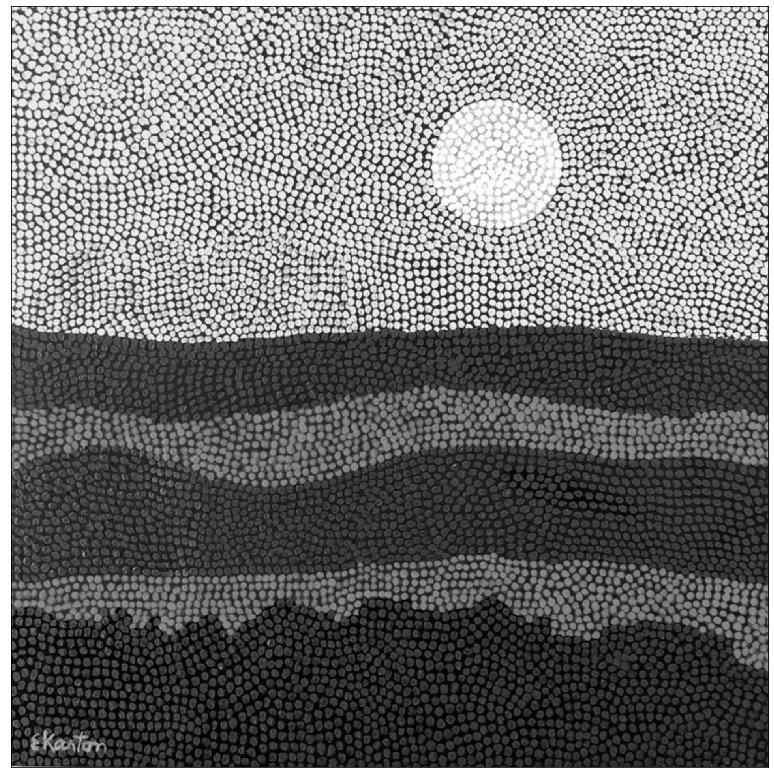

In [3]:
pintura_puntos = rgb2gray(data.imread('D:/MASTER IA/PRIMER_CUATRIMESTRE/04_Percepcion_Computacional/ACTIVIDADES/ACTIVIDAD_3/Pintura_Puntos.jpg'))
imshow(pintura_puntos)

* Buscamos umbralizar la imagen, será complicado si se utilizan métodos no adaptativos, ya que existen diferentes colores dentro de la imagen. Para ello, se deberá hacer uso de técnicas de umbralización que eviten este efecto.
* Para ello usamos varias tecnicas de binarizacion "threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola" y la que nos da mejor resultado es "threshold_sauvola"

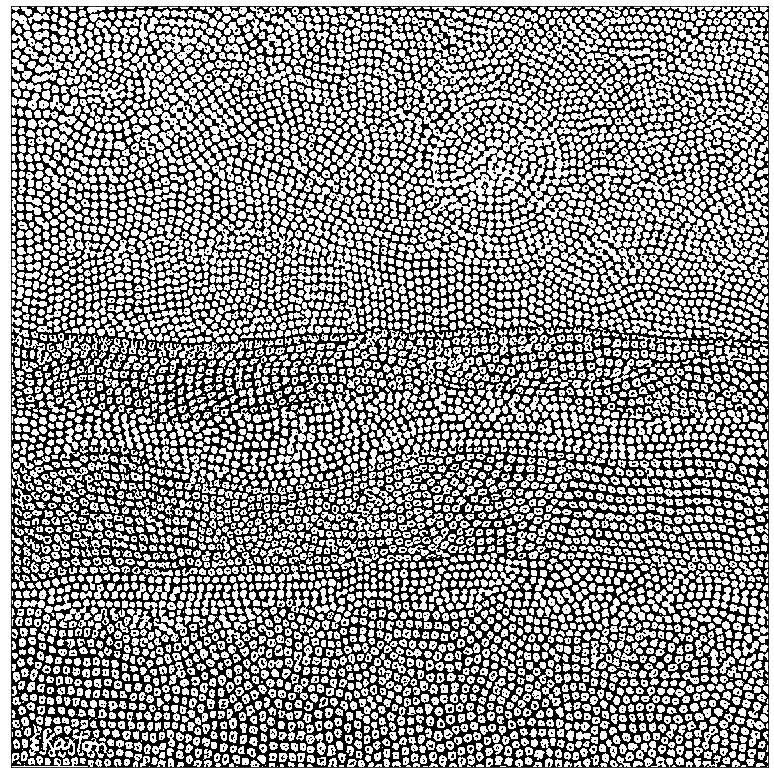

In [4]:
##se realiza la binarizacion:
th = threshold_sauvola(pintura_puntos, k=0)
im_bin = pintura_puntos > th 
imshow(im_bin)

* Vamosa mejorar la imagen binarizada para el objetivo final que es hacer el conteo de circulos dentro de la imagen.
    * Primero eliminamos todas las formas menores de 5 pixeles
     * Realizamos una dilatacion con un disco de tamaño 1, usamos el tipo disk como elemento estructural pues queremos contar la forma de circulos.
     * Realizamos una erosion con un disco de tamaño 2.
     * Vuelvoemos a eliminar las figuras que tengan un tamaño menor a los 1 pixel.
     * Rellenamos los posibles huecos en la region.

* Usamos la funcion "reconstruction" ya que utiliza dos imágenes: una imagen "semilla" (im_bin), que especifica los valores que se extienden, y una imagen "máscara", que proporciona el valor máximo permitido en cada píxel(seed[1:-1, 1:-1] = im_bin.max()mask = im_bin). 
* La imagen de la máscara, como el elemento estructurante, limita la propagación de valores de alta intensidad. La reconstrucción por erosión es simplemente lo inverso: los valores de baja intensidad se extienden desde la imagen de la semilla y están limitados por la imagen de la máscara, que representa el valor mínimo permitido.

Filled


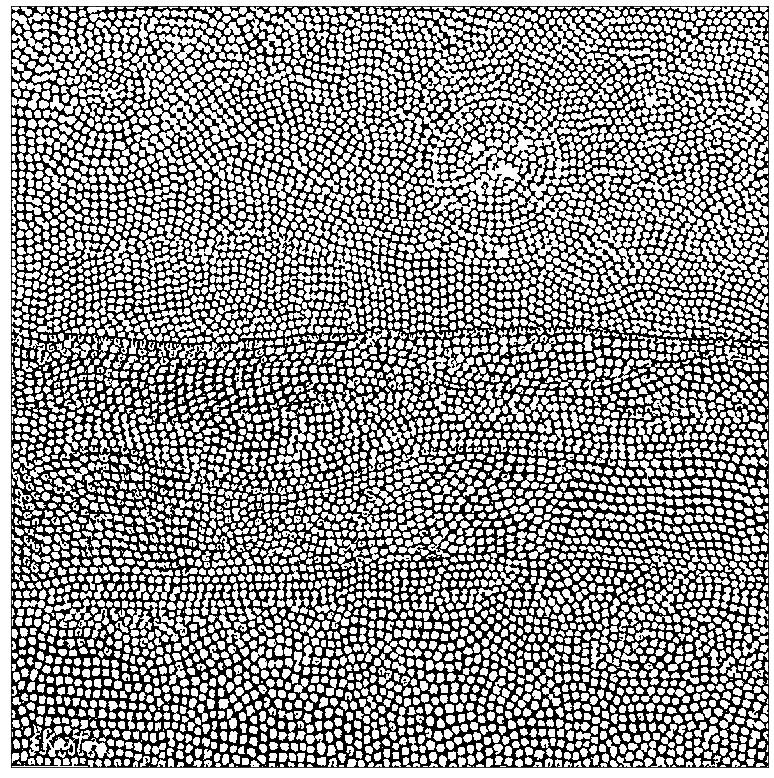

Binary fill holes


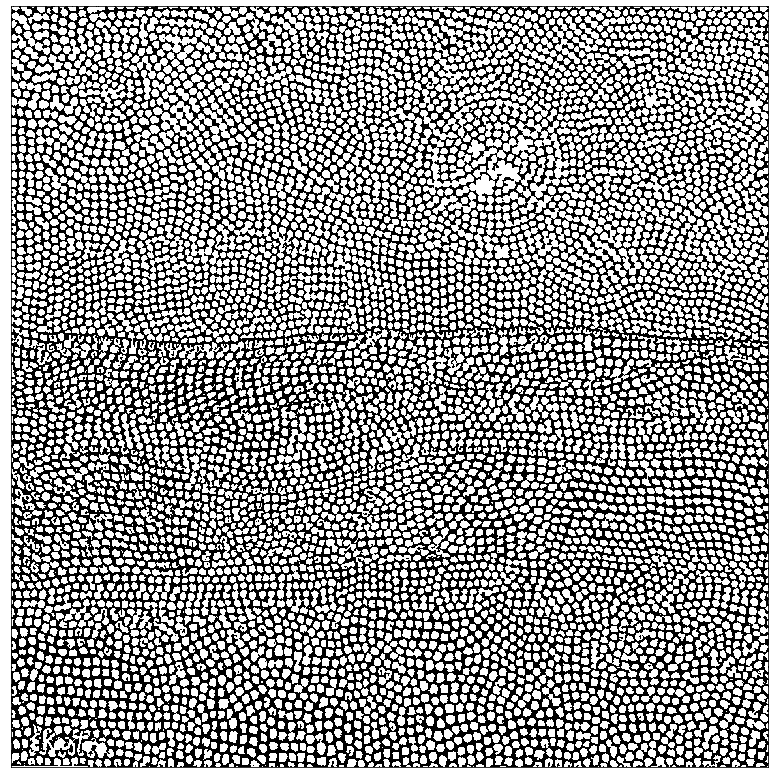

remove_small_objects


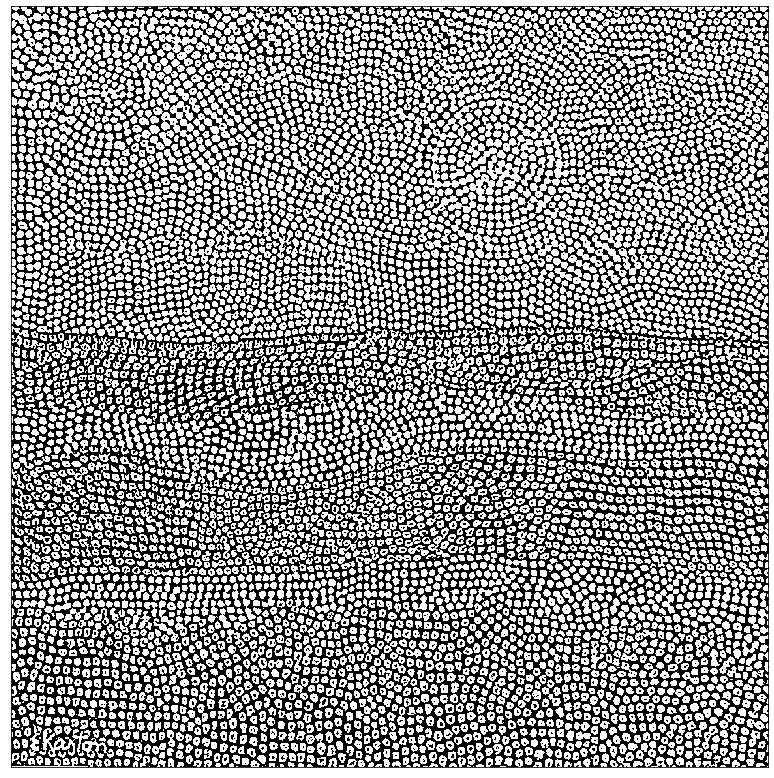

dilation


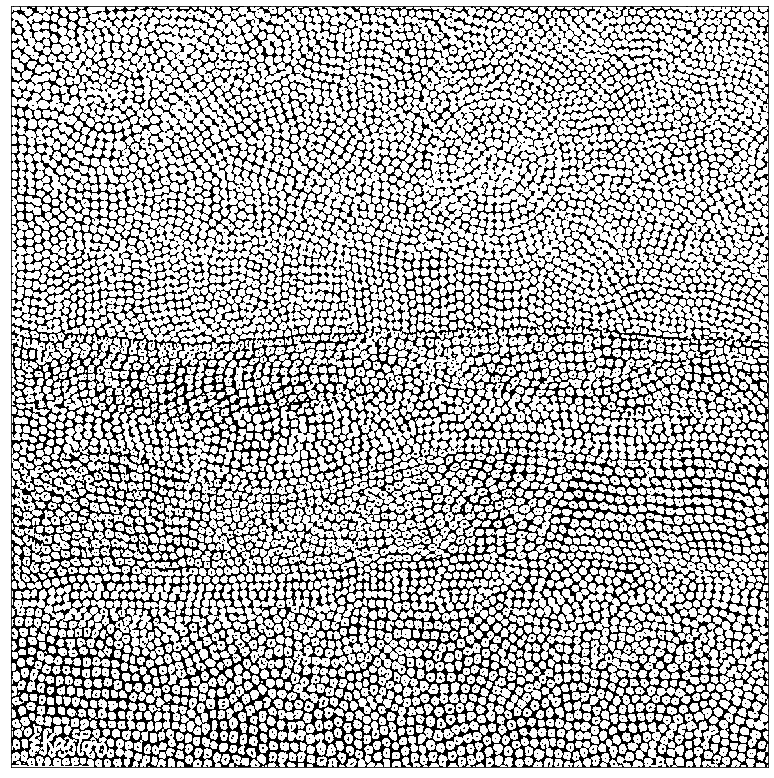

erosion


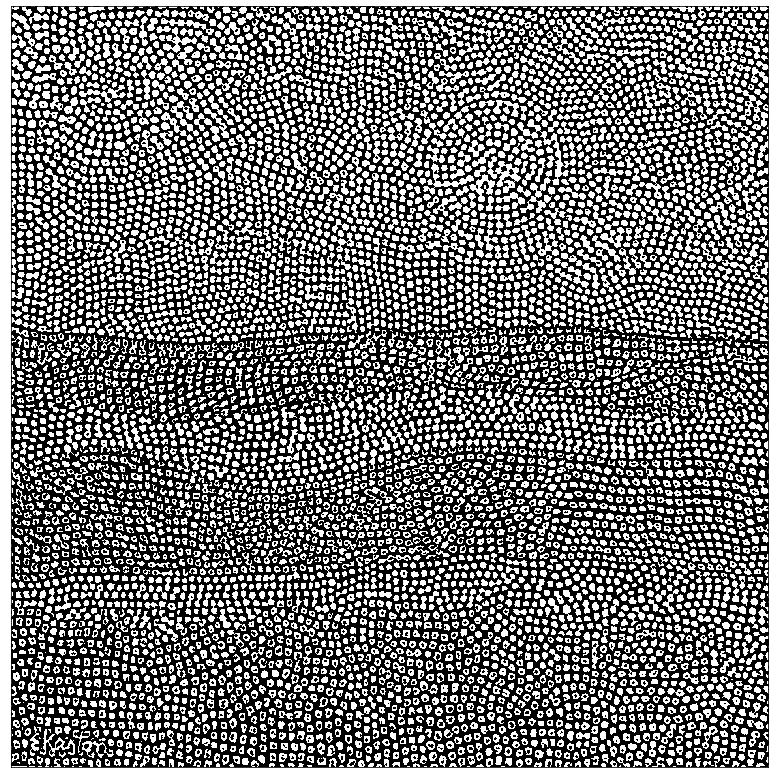

remove_small_objects


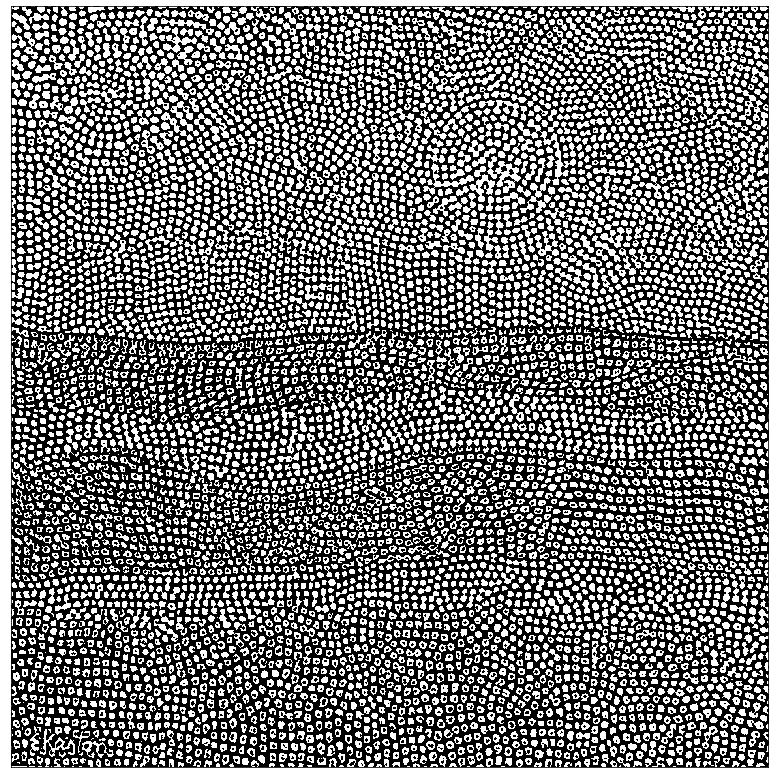

binary_fill_holes


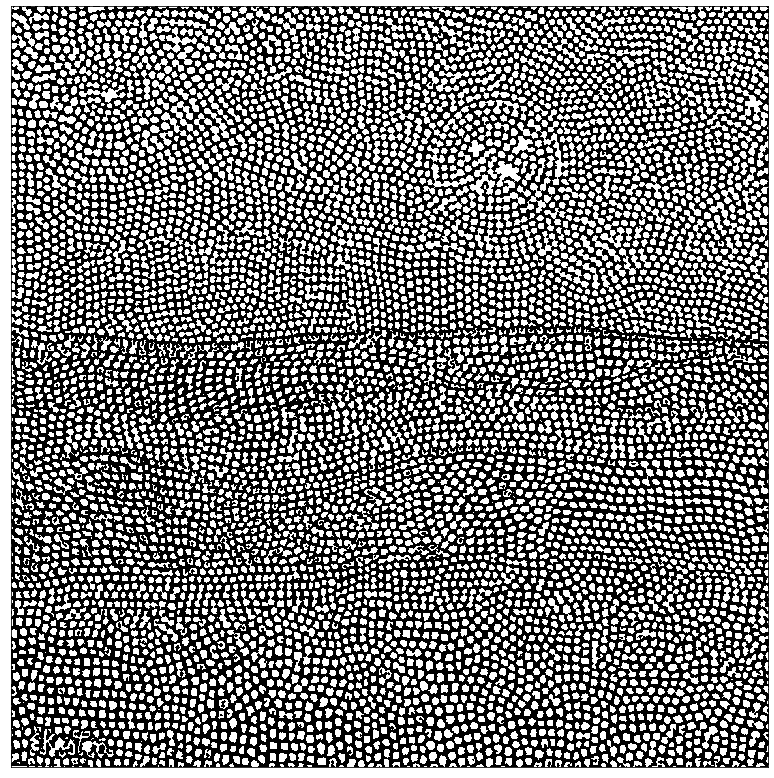

In [5]:
##elimino las formas de menor tamaño (menor de 5 pixeles)
img1 = remove_small_objects(im_bin , 5)
##realizo una dilatacion con un disco de tamaño 1
img2 = dilation(image = img1, selem = disk(1))
##realizo una erosion con un disco de tamaño 2
img3 = erosion(image = img2, selem = disk(2))
##vuelvo a eliminar las figuras que tengan un tamaño menor a los 1 pixel
img4 = remove_small_objects(img3 ,1)
##relleno los posibles huecos en la region
img5 = ndi.binary_fill_holes(img4)


# Ponemos la semilla y la mascara para poder usar la funcio "reconstruction"
seed = np.copy(im_bin)
seed[1:-1, 1:-1] = im_bin.max()
mask = im_bin



filled = reconstruction(seed, mask, method='erosion')
print("Filled")
imshow(filled)


print("Binary fill holes")


# Imprimomos las imagenes por pantalla

binary_holes = ndimage.binary_fill_holes(im_bin, structure=None, output=None, origin=0)
imshow(binary_holes)

print("remove_small_objects")
imshow(img1)
print("dilation")
imshow(img2)
print("erosion")
imshow(img3)
print("remove_small_objects")
imshow(img4)
print("binary_fill_holes")
imshow(img5)

* Nos quedamos con la imegen 4 y usamos la funcion label para que nos ayude a contar las iamgenes.
* Usamos un contador cuyos pixeles sean mayores o iguales a 0.
* Le damos color para ver las diferencias entre los circulos.

Contador Grupo!!! 6255


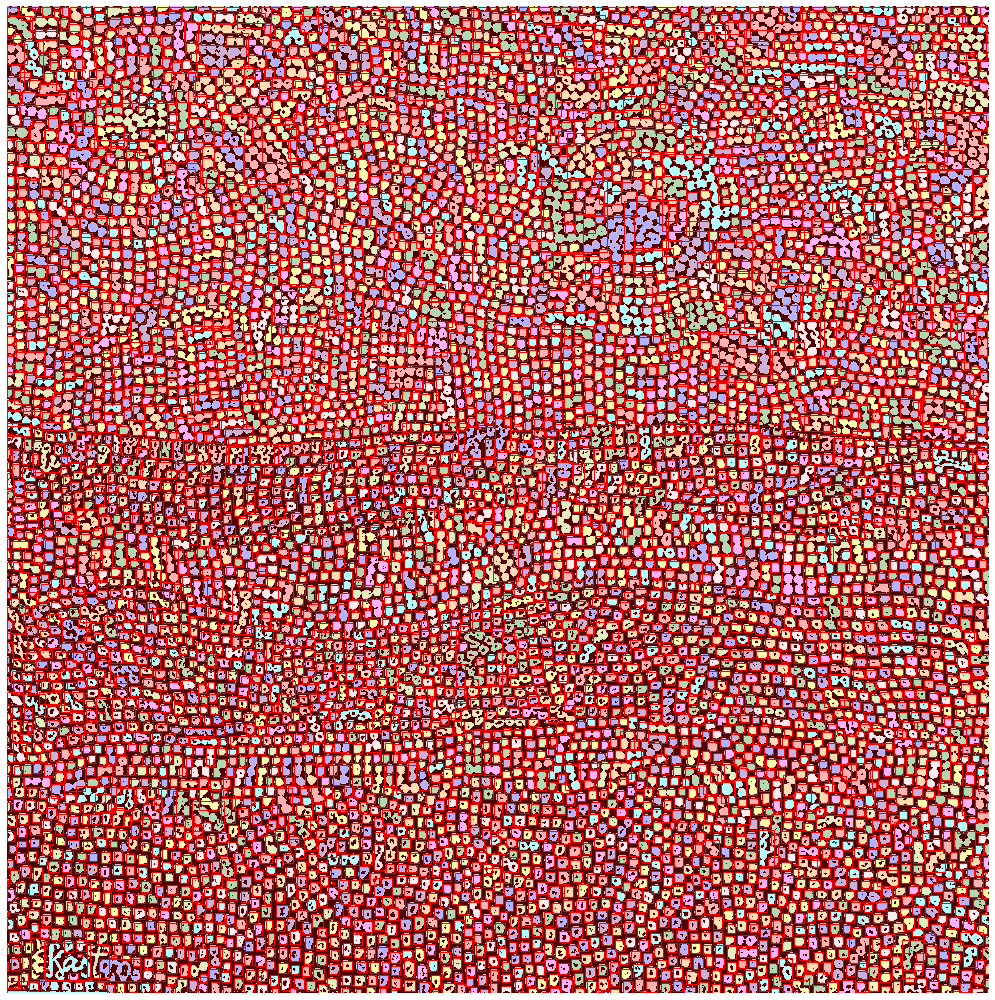

In [6]:
#cleared = clear_border(img4)
# label image regions
label_image = label(img4)
image_label_overlay = label2rgb(label_image, image=im_bin)

fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(image_label_overlay)

counter = 0
for region in regionprops(label_image):
    # take regions with large enough areas

    if region.area >= 0:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox

        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=1)

        ax.add_patch(rect)
        counter += 1

print("Contador Grupo!!!", counter)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [7]:
label(img4, 8, return_num=True)

(array([[   1,    1,    1, ...,   74,   74,   74],
        [   1,    1,    1, ...,    0,    0,    0],
        [   1,    1,    1, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0, 6238, 6238],
        [6177, 6177, 6177, ..., 6238, 6238, 6238],
        [6177, 6177, 6177, ..., 6238, 6238, 6238]], dtype=int64), 6255)